In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as stats 

In [ ]:
%matplotlib inline

In [ ]:
y = np.random.random(140)
x =np.arange(len(y))

In [ ]:
print (max(y), min(y))

0.9966777153702742 0.019106703656228574


Banyak data


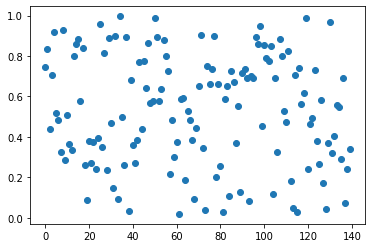

In [ ]:
plt.scatter(x,y)
print('Banyak data')

In [ ]:
y[16] = 40
y[106] = 50

Scater dari penyerapan nilai y


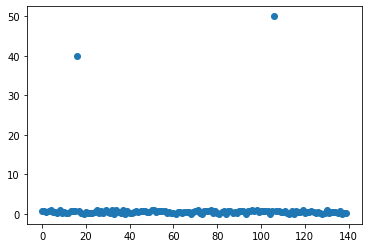

In [ ]:
plt.scatter(x,y)
print('Scater dari penyerapan nilai y')

In [ ]:
def grubbs_stat(y):
  std_dev = np.std(y)
  avg_y = np.mean(y)

In [ ]:
def grubbs_stat(y):
  # Simpangan y
  std_dev = np.std(y)
  # Rata-rata y
  avg_y = np.mean(y)
  # Nilai Mutlak selisih data dengan rata-rata
  abs_val_minus_avg = abs(y - avg_y)
  # Nilai Maksimal Selisih
  max_of_deviations = max(abs_val_minus_avg)
  # Indeks Nilai Maksimal Selisih
  max_ind = np.argmax(abs_val_minus_avg)
  # Menghitung GCAL
  Gcal = max_of_deviations/ std_dev
  print("Grubbs Statistics Value : {}".format(Gcal))
  return Gcal,max_ind

In [ ]:
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha /(2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size -2 +np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [ ]:
def check_G_values(Gs, Gc, inp, max_index):
  if Gs > Gc:
    print(
      "{}  is an outlier. G > G-critical: {:.4f} ?  > {:.4f} \n".format(
          inp[max_index], Gs, Gc
      )
    )
  else:
    print(
        "{} is not  an outlier. G > G-critical: {:.4f} ?  > {:.4f} \n".format(
            inp[max_index], Gs, Gc
      )
    )

In [ ]:
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [ ]:
ESD_Test(y, 0.05, 3)

Grubbs Critical Value: 3.49510889915825
Grubbs Statistics Value : 9.183370520818274
50.0  is an outlier. G > G-critical: 9.1834 ?  > 3.4951 

Grubbs Critical Value: 3.4928175069609186
Grubbs Statistics Value : 11.70839343934217
40.0  is an outlier. G > G-critical: 11.7084 ?  > 3.4928 

Grubbs Critical Value: 3.490506499576398
Grubbs Statistics Value : 1.87085487711767
0.019106703656228574 is not  an outlier. G > G-critical: 1.8709 ?  > 3.4905 

